# Predict Fed Discount Rate - Build Dataset

This notebook will attempt to predict future Fed Discount Rates, based on other aggregrate US economic data.
This notebook will first build the necessary dataset, by scraping the US government data, processing, exploring and joining.

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Fed Discount Rate

The FED (primary) discount rate is the:

`The interest rate at which an eligible financial institution may borrow funds directly from a Federal Reserve bank`

It directly dictates US interest rates and general market liquidity.

In [2]:
FED_DISCOUNT_RATE_URL = 'https://www.frbdiscountwindow.org/-/media/documents/primarysecondary.xlsx'
fed_rate_raw_df = pd.read_excel(FED_DISCOUNT_RATE_URL)

In [3]:
print(fed_rate_raw_df.shape)
fed_rate_raw_df.head()

(79, 16)


,Rate Type,Unnamed: 1,Effective Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Primary* Credit,Secondary** Credit,1\nBoston,2\nNew York,3\nPhiladelphia,4 \nCleveland,5 \nRichmond,6 \nAtlanta,7\nChicago,8 \nSt. Louis,9 \nMinneapolis,10 \nKansas City,11 \nDallas,12 \nSan Francisco,NaN,NaN
1,0.045,0.05,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,NaN,NaN
2,0.0475,0.0525,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,NaN,NaN
3,0.05,0.055,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,NaN,NaN
4,0.055,0.06,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,NaN,NaN


In [4]:
temp_df = fed_rate_raw_df.iloc[1:61, 2:14]
temp_df

,Effective Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00,2024-12-19 00:00:00
2,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00,2024-11-08 00:00:00
3,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00,2024-09-19 00:00:00
4,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00,2023-07-27 00:00:00
5,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00,2023-05-04 00:00:00
6,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00,2023-03-23 00:00:00
7,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00,2023-02-02 00:00:00
8,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00,2022-12-15 00:00:00
9,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00,2022-11-03 00:00:00
10,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00,2022-09-22 00:00:00


In [5]:
fed_rate_dates = []
for _, row in temp_df.iterrows():
    fed_rate_dates.append(set([str(x) for x in row]))
for d_set in fed_rate_dates:
    if len(d_set) > 1:
        print(d_set)
        print(min(d_set))

{'2022-06-16 00:00:00', '2022-06-17 00:00:00'}
2022-06-16 00:00:00
{'2019-09-19 00:00:00', '2019-09-20 00:00:00'}
2019-09-19 00:00:00
{'2008-12-18 00:00:00', '2008-12-16 00:00:00', '2008-12-17 00:00:00'}
2008-12-16 00:00:00
{'2008-10-31 00:00:00', '2008-10-29 00:00:00', '2008-10-30 00:00:00'}
2008-10-29 00:00:00
{'2008-10-09 00:00:00', '2008-10-08 00:00:00'}
2008-10-08 00:00:00
{'2008-04-30 00:00:00', '2008-05-01 00:00:00'}
2008-04-30 00:00:00
{'2008-03-20 00:00:00', '2008-03-18 00:00:00', '2008-03-19 00:00:00'}
2008-03-18 00:00:00
{'NaT', '2008-03-17 00:00:00'}
2008-03-17 00:00:00
{'2008-01-31 00:00:00', '2008-01-30 00:00:00'}
2008-01-30 00:00:00
{'2008-01-22 00:00:00', '2008-01-23 00:00:00', '2008-01-24 00:00:00'}
2008-01-22 00:00:00
{'2007-12-13 00:00:00', '2007-12-12 00:00:00', '2007-12-11 00:00:00'}
2007-12-11 00:00:00
{'2007-11-01 00:00:00', '2007-10-31 00:00:00'}
2007-10-31 00:00:00
{'2007-09-20 00:00:00', '2007-09-19 00:00:00', '2007-09-18 00:00:00'}
2007-09-18 00:00:00
{'2007-

Upon exploration, it's evident that nearly all of the 12 Fed branch banks share the same rate change start dates.
But, to be exact, choose the earliest date for the new rate change.

In [6]:
# fed_rate_filt_df = fed_rate_raw_df.iloc[1:61, [0, 2]]
fed_rate_filt_df = fed_rate_raw_df[['Rate Type']][1:61]
fed_rate_filt_df['Start Date'] = [min(d_set) for d_set in fed_rate_dates]
fed_rate_filt_df.iloc[40, 0] = 0.0575
print(fed_rate_filt_df.shape)
fed_rate_filt_df

(60, 2)


,Rate Type,Start Date
1,0.045,2024-12-19 00:00:00
2,0.0475,2024-11-08 00:00:00
3,0.05,2024-09-19 00:00:00
4,0.055,2023-07-27 00:00:00
5,0.0525,2023-05-04 00:00:00
6,0.05,2023-03-23 00:00:00
7,0.0475,2023-02-02 00:00:00
8,0.045,2022-12-15 00:00:00
9,0.04,2022-11-03 00:00:00
10,0.0325,2022-09-22 00:00:00


In [7]:
fed_rate_processed_df = fed_rate_filt_df.copy()
fed_rate_processed_df.rename(columns={'Rate Type': 'Rate'}, inplace=True)
fed_rate_processed_df['Rate'] = fed_rate_processed_df['Rate'] * 100
fed_rate_processed_df['Start Date'] = pd.to_datetime(fed_rate_processed_df['Start Date'])
fed_rate_processed_df

,Rate,Start Date
1,4.5,2024-12-19
2,4.75,2024-11-08
3,5.0,2024-09-19
4,5.5,2023-07-27
5,5.25,2023-05-04
6,5.0,2023-03-23
7,4.75,2023-02-02
8,4.5,2022-12-15
9,4.0,2022-11-03
10,3.25,2022-09-22


In [8]:
fed_rate_changes_map = {}
for _, row in fed_rate_processed_df.iterrows():
    k = str(row['Start Date'])[:7]
    fed_rate_changes_map[k] = round(row['Rate'], 2)
print(fed_rate_processed_df.shape)
print(len(fed_rate_changes_map))
fed_rate_changes_map

(60, 2)
56


{'2024-12': 4.5,
 '2024-11': 4.75,
 '2024-09': 5.0,
 '2023-07': 5.5,
 '2023-05': 5.25,
 '2023-03': 5.0,
 '2023-02': 4.75,
 '2022-12': 4.5,
 '2022-11': 4.0,
 '2022-09': 3.25,
 '2022-07': 2.5,
 '2022-06': 1.75,
 '2022-05': 1.0,
 '2022-03': 0.5,
 '2020-03': 1.75,
 '2019-10': 2.25,
 '2019-09': 2.5,
 '2019-08': 2.75,
 '2018-12': 3.0,
 '2018-09': 2.75,
 '2018-06': 2.5,
 '2018-03': 2.25,
 '2017-12': 2.0,
 '2017-06': 1.75,
 '2017-03': 1.5,
 '2016-12': 1.25,
 '2015-12': 1.0,
 '2010-02': 0.75,
 '2008-12': 0.5,
 '2008-10': 1.75,
 '2008-04': 2.25,
 '2008-03': 3.25,
 '2008-01': 4.0,
 '2007-12': 4.75,
 '2007-10': 5.0,
 '2007-09': 5.25,
 '2007-08': 5.75,
 '2006-06': 6.25,
 '2006-05': 6.0,
 '2006-03': 5.75,
 '2006-01': 5.5,
 '2005-12': 5.25,
 '2005-11': 5.0,
 '2005-09': 4.75,
 '2005-08': 4.5,
 '2005-06': 4.25,
 '2005-05': 4.0,
 '2005-03': 3.75,
 '2005-02': 3.5,
 '2004-12': 3.25,
 '2004-11': 3.0,
 '2004-09': 2.75,
 '2004-08': 2.5,
 '2004-06': 2.25,
 '2003-06': 2.0,
 '2003-01': 2.25}

In [9]:
START_YEAR = 2003
END_YEAR = 2024
fed_rates = []
last_rate_change = fed_rate_changes_map['2003-01']
for y in range(START_YEAR, END_YEAR + 1):
    for m in range(1, 12 + 1):
        k = f'{y}-{m if m >= 10 else "0" + str(m)}'
        if k in fed_rate_changes_map:
            last_rate_change = fed_rate_changes_map[k]
        fed_rates.append(last_rate_change)
print(len(fed_rates))
fed_rates

264


[2.25,
 2.25,
 2.25,
 2.25,
 2.25,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.25,
 2.25,
 2.5,
 2.75,
 2.75,
 3.0,
 3.25,
 3.25,
 3.5,
 3.75,
 3.75,
 4.0,
 4.25,
 4.25,
 4.5,
 4.75,
 4.75,
 5.0,
 5.25,
 5.5,
 5.5,
 5.75,
 5.75,
 6.0,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 6.25,
 5.75,
 5.25,
 5.0,
 5.0,
 4.75,
 4.0,
 4.0,
 3.25,
 2.25,
 2.25,
 2.25,
 2.25,
 2.25,
 2.25,
 1.75,
 1.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.

In [10]:
years = [y for y in range(START_YEAR, END_YEAR + 1) for _ in range(12)]
months = list(range(1, 12 + 1)) * (END_YEAR - START_YEAR + 1)
fed_rate_df = pd.DataFrame({'Year': years, 'Month': months, 'Rate': fed_rates})
fed_rate_df

,Year,Month,Rate
0,2003,1,2.25
1,2003,2,2.25
2,2003,3,2.25
3,2003,4,2.25
4,2003,5,2.25
...,...,...,...
259,2024,8,5.50
260,2024,9,5.00
261,2024,10,5.00
262,2024,11,4.75


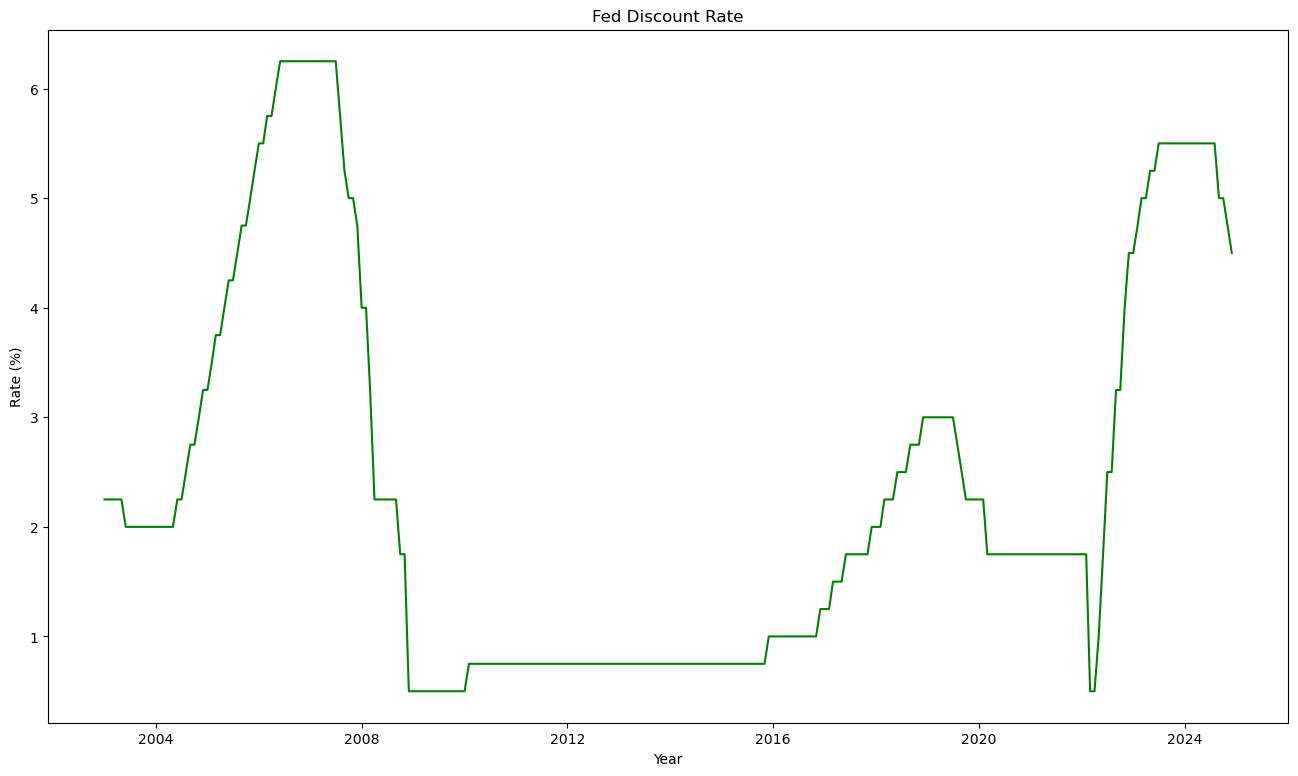

In [11]:
plt.rcParams["figure.figsize"] = (16, 9)
dt = pd.to_datetime(dict(year=fed_rate_df['Year'], month=fed_rate_df['Month'], day=[1 for _ in range(fed_rate_df.shape[0])]))
# plt.plot(list(range(fed_rate_df.shape[0])), fed_rate_df['Rate'], color='green')
plt.plot(dt, fed_rate_df['Rate'], color='green')
# axes = plt.gca()
# axes.set_xlim([0, 100])
# axes.set_ylim([0, 1])
plt.title('Fed Discount Rate')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.show()